## SQL para Análise de Dados

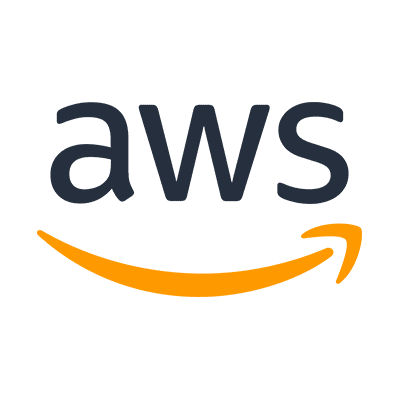



## Fonte e Amostragem

O conjunto de dados utilizado neste projeto é uma subamostra do dataset original do professor André Perez. Esta subamostra foi selecionada com o objetivo de facilitar o processamento e análise dos dados para este projeto específico. É importante observar que podem existir discrepâncias nas proporções das categorias entre esta amostra parcial e o conjunto de dados original.

Para acessar o dataset completo, visite o repositório GitHub do professor André Perez no seguinte link: [Dataset Completo](https://github.com/andre-marcos-perez/ebac-course-utils/blob/main/dataset/credito.csv).

### Considerações sobre a Amostra

Devido à amostragem, as estimativas baseadas neste conjunto de dados podem ter menor precisão comparadas com a análise realizada com o dataset completo. Os resultados apresentados aqui são para fins didáticos e para demonstração pessoal no portfólio. As mesmas queries e análises podem ser aplicadas ao dataset completo para obter conclusões mais precisas e confiáveis.

### Descrição das Variáveis

O conjunto de dados fornece informações sobre clientes de um banco e inclui as seguintes variáveis:


- **idade**: Idade do cliente (tipo: inteiro)
- **sexo**: Sexo do cliente (F ou M) (tipo: string)
- **dependentes**: Número de dependentes do cliente (tipo: inteiro)
- **escolaridade**: Nível de escolaridade do cliente (tipo: string)
- **estado_civil**: Estado civil do cliente (tipo: string)
- **salario_anual**: Faixa salarial do cliente (tipo: string)
- **tipo_cartao**: Tipo de cartão do cliente (tipo: string)
- **qtd_produtos**: Quantidade de produtos comprados nos últimos 12 meses (tipo: bigint)
- **iteracoes_12m**: Quantidade de iterações/transações nos últimos 12 meses (tipo: inteiro)
- **meses_inativo_12m**: Quantidade de meses que o cliente ficou inativo (tipo: inteiro)
- **limite_credito**: Limite de crédito do cliente (tipo: float)
- **valor_transacoes_12m**: Valor das transações dos últimos 12 meses (tipo: float)
- **qtd_transacoes_12m**: Quantidade de transações dos últimos 12 meses (tipo: inteiro)


In [5]:
pd.read_csv('https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/dataset/credito.csv')

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,na,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,na,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,na,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62


In [16]:
#BIBLIOTECAS UTILIZADAS
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# **1. Criação da tabela**

A primeira etapa é a criação da tabela com o *dataset* armazenado no **Amazon S3 Bucket** por meio de uma *query* no **AWS Athena**, para posteriormente realizar as consultas.

```sql
CREATE EXTERNAL TABLE IF NOT EXISTS default.credito (
    `idade` int,
    `sexo` string,
    `dependentes` int,
    `escolaridade` string,
    `estado_civil` string,
    `salario_anual` string,
    `tipo_cartao` string,
    `qtd_produtos` bigint,
    `iteracoes_12m` int,
    `meses_inativo_12m` int,
    `limite_credito` float,
    `valor_transacoes_12m` float,
    `qtd_transacoes_12m` int
)
ROW FORMAT SERDE 'org.apache.hadoop.hive.serde2.lazy.LazySimpleSerDe'
WITH SERDEPROPERTIES (
    'serialization.format' = ',',
    'field.delim' = ','
)
LOCATION 's3://credito/'
TBLPROPERTIES ('has_encrypted_data' = 'false');
```

# **2. EDA (Exploratory Data Analysis)**

## 2.1 Preview da tabela

  **QUERY 1**

```sql
DESCRIBE credito;
```

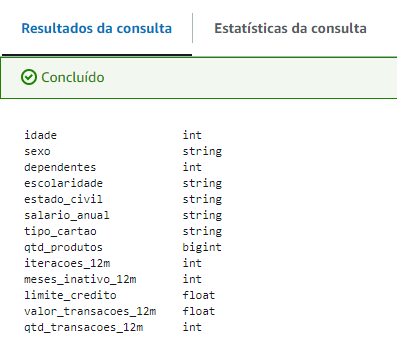

*Após a criação da tabela, é recomendável utilizar a função "DESCRIBE" para verificar se a operação foi realizada com sucesso. Essa função fornece uma visão geral da estrutura da tabela, incluindo os nomes das colunas, tipos de dados e quaisquer restrições associadas. Isso garante que a tabela foi criada conforme o esperado e ajuda a identificar possíveis erros ou discrepâncias na definição da estrutura.*

**QUERY 2**

```sql
select * from credito limit 10;
```

In [6]:
pd.read_csv("https://raw.githubusercontent.com/allansantos881/awssqlprojeto/main/query%202.csv")

,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,45,M,3,ensino medio,casado,$60K - $80K,blue,5,3,1,12691.51,1144.90,42
1,49,F,5,mestrado,solteiro,menos que $40K,blue,6,2,1,8256.96,1291.45,33
2,51,M,3,mestrado,casado,$80K - $120K,blue,4,0,1,3418.56,1887.72,20
3,40,F,4,ensino medio,na,menos que $40K,blue,3,1,4,3313.03,1171.56,20
4,40,M,3,sem educacao formal,casado,$60K - $80K,blue,5,0,1,4716.22,816.08,28
5,44,M,2,mestrado,casado,$40K - $60K,blue,3,2,1,4010.69,1088.07,24
6,51,M,4,na,casado,$120K +,gold,6,3,1,34516.72,1330.87,31
7,32,M,0,ensino medio,na,$60K - $80K,silver,2,2,2,29081.49,1538.32,36
8,37,M,3,sem educacao formal,solteiro,$60K - $80K,blue,5,0,2,22352.50,1350.14,24
9,48,M,2,mestrado,solteiro,$80K - $120K,blue,6,3,3,11656.41,1441.73,32


*Esse comando retorna as primeiras 10 linhas da tabela "credito", permitindo uma verificação preliminar dos dados armazenados. A amostra dos dados inclui informações sobre clientes, como idade, sexo, dependentes, escolaridade, estado civil, faixa salarial, tipo de cartão, quantidade de produtos comprados, número de transações realizadas, meses inativos, limite de crédito, valor das transações e quantidade total de transações.*

**QUERY 3**

```sql
select count(*) from credito;
```

In [7]:
pd.read_csv("https://raw.githubusercontent.com/allansantos881/awssqlprojeto/main/query%203.csv")

,_col0
0,2564


*Isso indica que a tabela credito contém um total de **2.564** registros. Esse comando é útil para confirmar a quantidade de dados presentes na tabela e garantir que a tabela está corretamente populada.*

## 2.2 Analise Exploratória

**QUERY 4**

```sql
SELECT DISTINCT escolaridade FROM credito;
```

In [8]:
pd.read_csv("https://raw.githubusercontent.com/allansantos881/awssqlprojeto/main/query%204.csv")

,escolaridade
0,mestrado
1,graduacao
2,doutorado
3,sem educacao formal
4,na
5,ensino medio


*Este comando retorna uma lista de valores únicos na coluna escolaridade, fornecendo uma visão geral dos diferentes níveis de escolaridade presentes entre os clientes registrados na tabela.*

<ipython-input-18-e00be0e574d5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='escolaridade', y='contagem', data=df, palette='viridis')


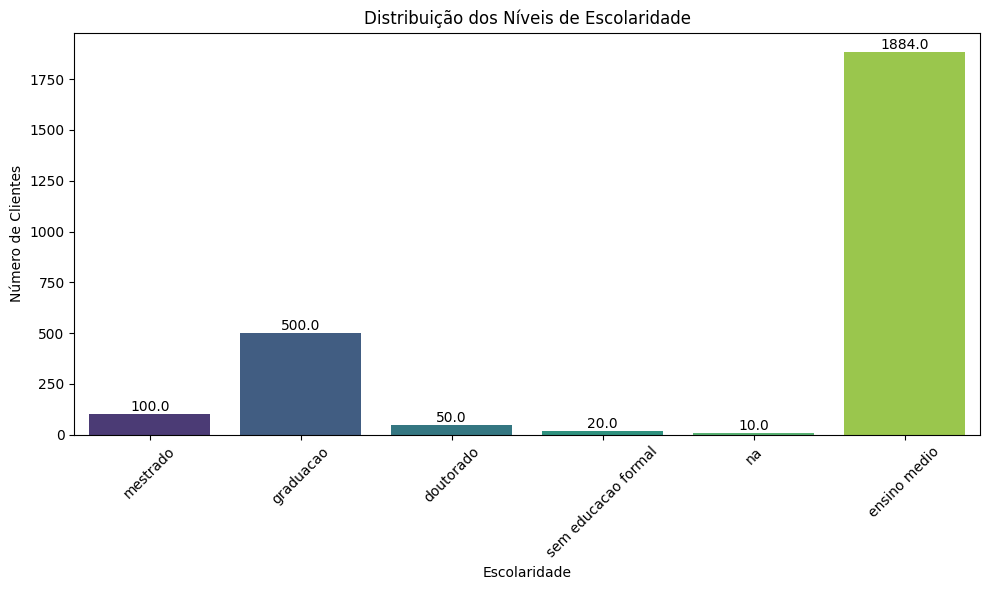

In [18]:
data = {
    'escolaridade': ['mestrado', 'graduacao', 'doutorado', 'sem educacao formal', 'na', 'ensino medio'],
    'contagem': [100, 500, 50, 20, 10, 1884]  # Substitua com os valores reais obtidos da análise
}

df = pd.DataFrame(data)

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='escolaridade', y='contagem', data=df, palette='viridis')

# Adicionando título e rótulos aos eixos
plt.title('Distribuição dos Níveis de Escolaridade')
plt.xlabel('Escolaridade')
plt.ylabel('Número de Clientes')

# Adicionando a quantidade em cima de cada barra
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**QUERY 5**

```sql
select count(*), salario_anual from credito group by salario_anual;
```

In [9]:
pd.read_csv("https://raw.githubusercontent.com/allansantos881/awssqlprojeto/main/query%205.csv")

,_col0,salario_anual
0,488,$80K - $120K
1,701,menos que $40K
2,235,na
3,451,$60K - $80K
4,467,$40K - $60K
5,222,$120K +


*Este comando agrupa os registros da tabela credito pela coluna salario_anual e conta o número de registros em cada faixa salarial. A tabela resultante mostra a quantidade de clientes em cada faixa de salário, permitindo uma análise da distribuição salarial entre os clientes.*

<ipython-input-20-3e387072b905>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='salario_anual', y='contagem', data=df, palette='viridis')


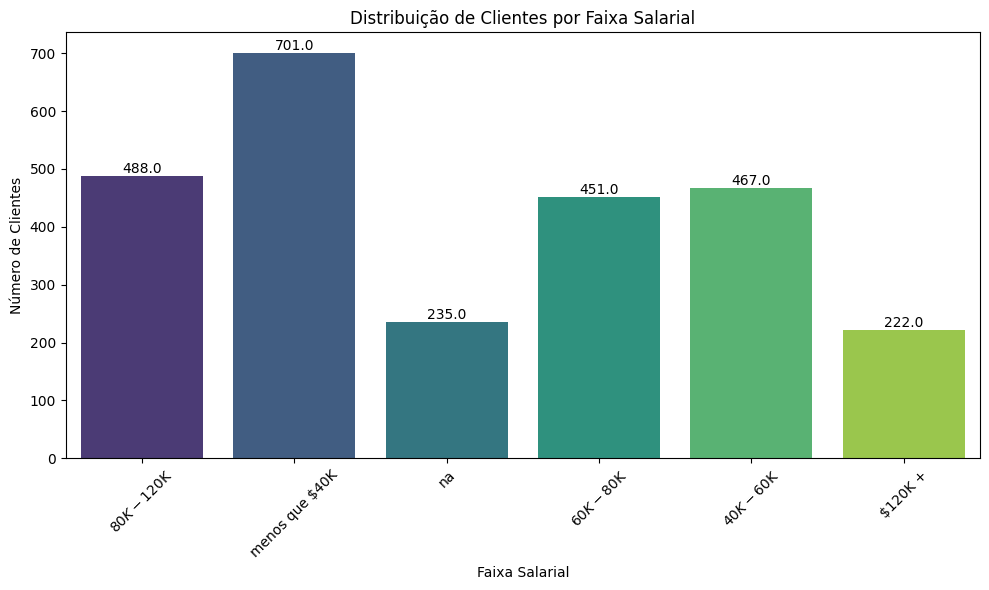

In [20]:
data = {
    'salario_anual': ['$80K - $120K', 'menos que $40K', 'na', '$60K - $80K', '$40K - $60K', '$120K +'],
    'contagem': [488, 701, 235, 451, 467, 222]
}

df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='salario_anual', y='contagem', data=df, palette='viridis')
plt.title('Distribuição de Clientes por Faixa Salarial')
plt.xlabel('Faixa Salarial')
plt.ylabel('Número de Clientes')

for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 5),
                textcoords='offset points')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**QUERY 6**

```sql
select count(*), sexo from credito group by sexo;
```

In [10]:
pd.read_csv("https://raw.githubusercontent.com/allansantos881/awssqlprojeto/main/query%206.csv")

,_col0,sexo
0,1563,M
1,1001,F


*Este comando agrupa os registros da tabela credito pela coluna sexo e conta o número de registros em cada grupo. A tabela resultante mostra a quantidade de clientes do sexo masculino e feminino, permitindo uma análise da distribuição de gênero entre os clientes.*

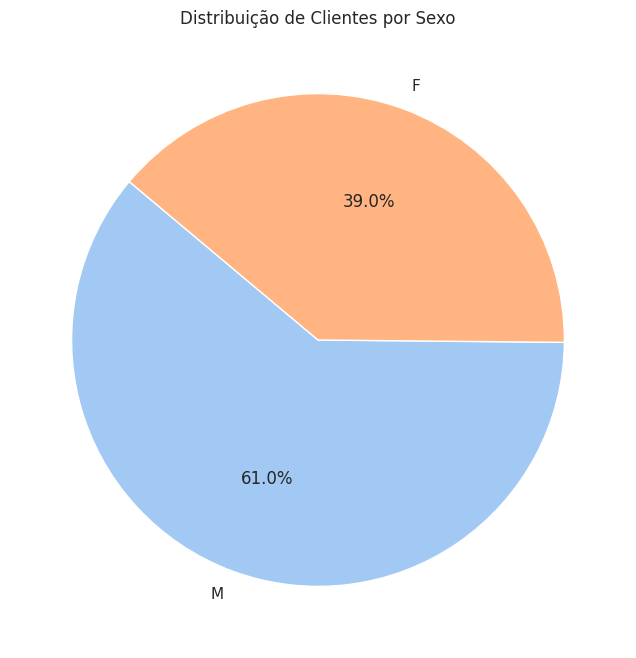

In [22]:
sns.set(style='whitegrid')

# Dados obtidos da consulta SQL
data = {
    'sexo': ['M', 'F'],
    'contagem': [1563, 1001]
}

df = pd.DataFrame(data)

# Criando o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(df['contagem'], labels=df['sexo'], autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)

# Adicionando título
plt.title('Distribuição de Clientes por Sexo')

# Exibindo o gráfico
plt.show()

**QUERY 6**

```sql
select max(limite_credito) as limite_credito, escolaridade, tipo_cartao, sexo from credito
where escolaridade != 'na' and tipo_cartao != 'na'
group by escolaridade, tipo_cartao, sexo
order by limite_credito desc
limit 10;
```

In [11]:
pd.read_csv("https://raw.githubusercontent.com/allansantos881/awssqlprojeto/main/query%207.csv")

,limite_credito,escolaridade,tipo_cartao,sexo
0,34516.99,sem educacao formal,blue,M
1,34516.98,mestrado,gold,M
2,34516.97,mestrado,blue,M
3,34516.96,sem educacao formal,silver,M
4,34516.96,doutorado,platinum,F
5,34516.95,ensino medio,gold,M
6,34516.94,graduacao,gold,F
7,34516.94,graduacao,gold,M
8,34516.89,graduacao,silver,M
9,34516.74,ensino medio,blue,M


*Esta consulta retorna os maiores limites de crédito, filtrados para excluir registros com valores 'na' em escolaridade e tipo_cartao, e ordenados em ordem decrescente. Os resultados são agrupados por escolaridade, tipo_cartao e sexo, mostrando as combinações que possuem os maiores limites de crédito.*

**QUERY 7**

```sql
select max(valor_transacoes_12m) as maior_valor_gasto, avg(valor_transacoes_12m) as media_valor_gasto, min(valor_transacoes_12m) as min_valor_gasto, sexo
from credito
group by sexo;
```

In [13]:
pd.read_csv("https://raw.githubusercontent.com/allansantos881/awssqlprojeto/main/query%208.csv")

,maior_valor_gasto,media_valor_gasto,min_valor_gasto,sexo
0,4776.58,1839.6226,510.16,F
1,4686.93,1807.9680,530.36,M


*Clientes do sexo feminino têm, em média, um valor gasto mais alto e um valor máximo de transação superior ao dos clientes do sexo masculino. No entanto, o menor valor gasto é ligeiramente mais baixo para o sexo feminino. Esses insights podem indicar diferenças no comportamento de gasto entre os sexos, com mulheres tendendo a realizar transações de maior valor médio e máximo.*

**QUERY 8**

```sql
select avg(qtd_produtos) as qts_produtos, avg(valor_transacoes_12m) as media_valor_transacoes, avg(limite_credito) as media_limite, sexo, salario_anual
from credito
where salario_anual != 'na'
group by sexo, salario_anual
order by avg(valor_transacoes_12m) desc;
```

In [14]:
pd.read_csv("https://raw.githubusercontent.com/allansantos881/awssqlprojeto/main/query%209.csv")

,qts_produtos,media_valor_transacoes,media_limite,sexo,salario_anual
0,4.394231,1963.6719,3452.4036,M,menos que $40K
1,4.291971,1878.2974,5753.3100,M,$40K - $60K
2,4.408710,1845.1332,4212.1987,F,menos que $40K
3,4.352550,1818.6364,9096.0280,M,$60K - $80K
4,4.440415,1781.4299,4773.4463,F,$40K - $60K
5,4.329918,1755.2499,14886.5560,M,$80K - $120K
6,4.328829,1701.4652,17801.4880,M,$120K +


A quantidade média de produtos comprados varia de forma relativamente constante entre as diferentes faixas salariais e sexos, com valores próximos em todas as categorias. Por exemplo, clientes com salários "menos que $40K" e "Feminino" compram uma média ligeiramente maior de produtos comparado com outras faixas salariais.

O valor médio das transações é geralmente mais alto para clientes com salários mais baixos. Por exemplo, clientes na faixa salarial "menos que $40K" (tanto masculino quanto feminino) têm valores médios de transações superiores em comparação com aqueles nas faixas salariais mais altas. Isso sugere que, embora esses clientes possam realizar mais transações, o valor médio de cada transação é menor. *texto em itálico*

# **3. Conclusão:**

A análise do conjunto de dados revelou diversos insights sobre o perfil dos clientes e seus comportamentos de transação. Os principais pontos destacados são:

1. **Perfil Salarial e Tipo de Cartão:**
   A maioria dos clientes possui um salário anual abaixo de $40.000,00 e usa o cartão do tipo blue, apresentando limites de crédito mais baixos. Esse perfil sugere que campanhas de marketing direcionadas a esse grupo poderiam ter um impacto considerável devido à sua representatividade significativa na base de clientes.

2. **Diferença por Gênero:**
   Os clientes do sexo masculino possuem limites de crédito máximos mais elevados em comparação com as clientes do sexo feminino. Contudo, é importante considerar que a proporção de clientes masculinos e femininos na base de dados não é equilibrada, o que pode influenciar essa diferença.

3. **Estado Civil e Comportamento de Transação:**
   Os clientes casados realizam o maior volume de transações, enquanto os clientes divorciados têm uma média de valor de transações mais alta. Isso sugere uma possível relação entre um menor número de transações e um valor mais elevado por transação entre clientes divorciados.

4. **Gênero e Estado Civil nas Transações:**
   Clientes solteiros e divorciados do sexo masculino realizam mais transações em comparação com as clientes do sexo feminino. No entanto, clientes casados realizam uma quantidade ligeiramente maior de transações em geral. Esses dados indicam a importância de considerar tanto o estado civil quanto o gênero ao elaborar estratégias de marketing personalizadas.

5. **Limite de Crédito e Tipo de Cartão:**
   Os clientes com cartões blue apresentam os limites de crédito mais baixos. Observa-se também que, dentro de cada tipo de cartão, o limite de crédito médio aumenta conforme a faixa salarial anual do cliente. Isso pode orientar ajustes nas ofertas e comunicações para alinhar com o perfil financeiro de cada cliente.

Esses insights proporcionam uma compreensão mais detalhada do comportamento dos clientes e podem fundamentar decisões estratégicas, permitindo uma segmentação mais eficaz e personalizada das campanhas de marketing. Para otimizar os esforços de marketing, recomenda-se um foco maior em clientes casados que utilizam o cartão blue e possuem um salário anual abaixo de $40.000,00. Essa abordagem visa aumentar a eficácia das campanhas ao concentrar-se em segmentos com maior potencial de resposta e engajamento, resultando em uma alocação mais eficiente dos recursos disponíveis e melhores resultados em aquisição e retenção de clientes.
